<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/Soluci%C3%B3_anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solució analítica que hem d'implementar és:

$T(x,t) = T_c + \sum\limits_{n=1}^{\infty}
\frac{4}{(2n-1)^3\pi^3} \,
(1 - e^{-(2n-1)^2 \pi^2 t}) \,
\sin\!\big[(2n-1)\pi x\big]$

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# 1. CONSTANTS FÍSIQUES
C_v    = 3686.0   # calor específic a volum constant
rho   = 1081.0   # densitat del material
kappa = 0.56     # conductivitat tèrmica
sigma = 0.472    # conductivitat elèctrica
volts = 40.0     # tensió eficaç aplicada


# 2. MAGNITUDS DE NORMALITZACIÓ
N= 101                        #Número de nodes espaials

x_0= 0.02                      #Normalització

x_f = 0.02/x_0                 #Doncs la x final ara normalitzada (0.02 és la long final en cm)

alpha = kappa / (C_v * rho)    # difusivitat tèrmica

t_0 = x_0**2 / alpha          # escala característica de temps

P_ext = (volts**2 * sigma) / (2 * x_0**2)

T_0 = (P_ext / (C_v * rho)) * t_0


# 3. CONDICIONS I TEMPS ADIMENSIONAL
T_init = 309.65/T_0  # temperatura de contorn en kelvin normalitzada

t_f = 0.025         # temps adimensional enunciat

N_termes = 1000     #termes del sumatori de la solució analítica

[36.5        37.66969108 38.77435843 39.81640155 40.79821065 41.72216161
 42.59061137 43.40589333 44.17031304 44.88614393 45.55562326 46.18094827
 46.76427258 47.30770281 47.81329544 48.28305393 48.71892617 49.12280218
 49.49651206 49.84182427 50.16044422 50.45401308 50.72410692 50.97223608
 51.19984486 51.40831139 51.5989478  51.77300054 51.93165096 52.07601608
 52.20714947 52.32604234 52.4336247  52.53076668 52.6182799  52.69691894
 52.7673828  52.83031643 52.88631226 52.9359117  52.9796066  53.0178407
 53.05101098 53.07946892 53.10352171 53.12343328 53.1394253  53.15167799
 53.16033078 53.16548288 53.16719366 53.16548288 53.16033078 53.15167799
 53.1394253  53.12343328 53.10352171 53.07946892 53.05101098 53.0178407
 52.9796066  52.9359117  52.88631226 52.83031643 52.7673828  52.69691894
 52.6182799  52.53076668 52.4336247  52.32604234 52.20714947 52.07601608
 51.93165096 51.77300054 51.5989478  51.40831139 51.19984486 50.97223608
 50.72410692 50.45401308 50.16044422 49.84182427 49.4

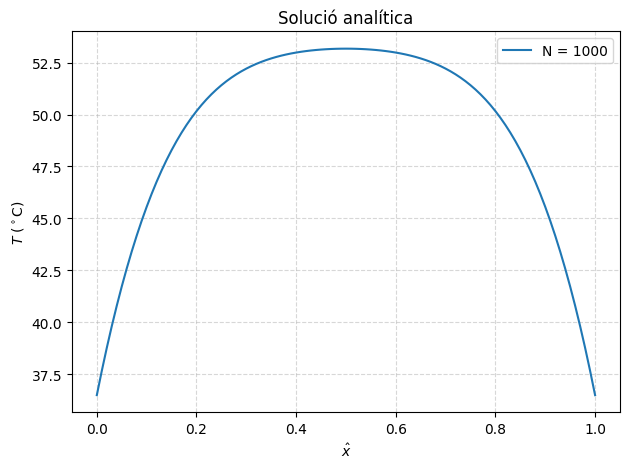

In [16]:
# 4. SOLUCIÓ ANALÍTICA ADIMENSIONAL
def T_analítica(T_init, x, t_f, N):
  """
  T_init: float de la temperatura inicial
  x: array dels nodes de x
  t_f: temps final (quan volem evaluar la funció)
  N: número de termes al sumatori
  """

  T_i= np.array([T_init]*101) #Convertim la temp. inicial a un array per poder sumar-li l'array que és cada coeficient del sumatori

  for i in range(1, N):
    T_i+= (4/(np.pi*(2*i-1))**3)*(1-np.exp(-((2*i-1)*np.pi)**2*t_f))*np.sin((2*i-1)*np.pi*x)
  return T_i

x_llista= np.linspace(0, x_f, N)

print(T_analítica(T_init, x_llista, t_f, N_termes)*T_0-273.15)


plt.figure()
plt.plot(x_llista, T_analítica(T_init, x_llista, t_f, N_termes)*T_0-273.15, label=f"N = {N_termes}")
plt.title('Solució analítica')
plt.xlabel(r"$\hat{x}$")
plt.ylabel(r"$T\ (\mathrm{^\circ C})$")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()